In [1]:
import os
import pandas as pd
import sys

In [2]:
sys.path.append(os.path.abspath('../..'))

In [3]:
from analysis.preprocessing import load_and_clean_heat_data

In [4]:
df = load_and_clean_heat_data()
df

,Entity,Code,Year,ocean_heat_content_noaa_2000m,ocean_heat_content_mri_2000m,ocean_heat_content_iap_2000m
0,World,OWID_WRL,1955,NaN,-14.032666,-10.506033
1,World,OWID_WRL,1956,NaN,-11.862667,-10.054033
2,World,OWID_WRL,1957,-10.169267,-13.632667,-10.476033
3,World,OWID_WRL,1958,-8.925266,-9.962666,-4.879034
4,World,OWID_WRL,1959,-9.579267,-11.782666,-7.605033
...,...,...,...,...,...,...
65,World,OWID_WRL,2020,25.525000,29.277334,29.420967
66,World,OWID_WRL,2021,27.280000,NaN,NaN
67,World,OWID_WRL,2022,28.192000,NaN,NaN
68,World,OWID_WRL,2023,29.220000,NaN,NaN


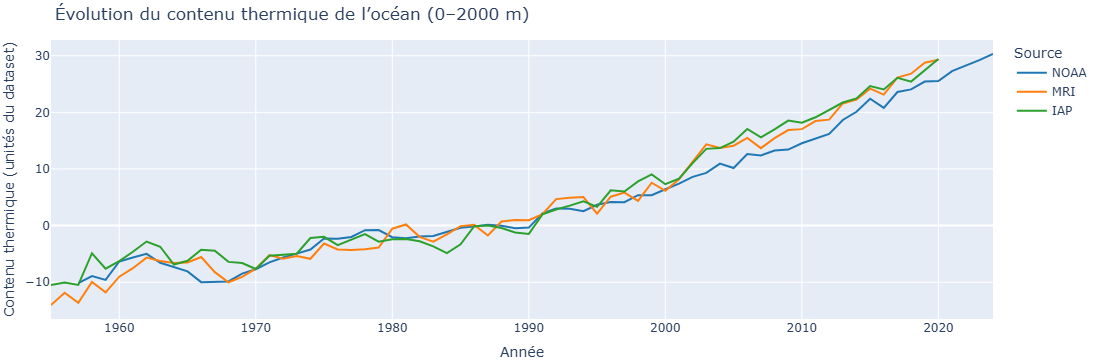

In [5]:
import plotly.express as px

fig = px.line(
    df,
    x="Year",
    y=[
        "ocean_heat_content_noaa_2000m",
        "ocean_heat_content_mri_2000m",
        "ocean_heat_content_iap_2000m"
    ],
    title="Évolution du contenu thermique de l’océan (0–2000 m)"
)

# mapping entre nom de colonne (automatique) et label lisible
rename_map = {
    "ocean_heat_content_noaa_2000m": "NOAA",
    "ocean_heat_content_mri_2000m": "MRI",
    "ocean_heat_content_iap_2000m": "IAP"
}
color_map = {
    "NOAA": "#1f77b4",
    "MRI":  "#ff7f0e",
    "IAP":  "#2ca02c"
}

# appliquer noms et couleurs
for trace in fig.data:
    # trace.name contient le nom de la colonne d'origine
    pretty = rename_map.get(trace.name, trace.name)
    trace.name = pretty
    trace.legendgroup = pretty
    trace.marker = dict()  # garde le style par défaut pour lignes
    trace.line.color = color_map.get(pretty)

fig.update_layout(
    xaxis_title="Année",
    yaxis_title="Contenu thermique (unités du dataset)",
    legend_title_text="Source",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()
